In [1]:
import scipy.io
data = scipy.io.loadmat('Data_ankle.mat')
ankle_data= data['ankle_data']
print(ankle_data.shape)

(48000, 7)


In [3]:
import pandas as pd
# Define column names
column_names = [
    'time', 
    'vgrf',  # vertical ground reaction force
    'trunk_angle',
    'hip_angle', 
    'knee_angle', 
    'ankle_angle', 
    'joint_moment'
]
df = pd.DataFrame(ankle_data, columns=column_names )
df.head()

,time,vgrf,trunk_angle,hip_angle,knee_angle,ankle_angle,joint_moment
0,0.00,-10.321381,-0.094286,0.292974,0.825063,-1.492588,-2.011628
1,0.01,-7.990312,-0.096174,0.293179,0.822469,-1.493192,-3.655209
2,0.02,-6.208738,-0.096449,0.294008,0.810997,-1.495867,-5.786433
3,0.03,-5.126637,-0.097196,0.295568,0.785731,-1.501793,-6.190008
4,0.04,-4.774037,-0.095624,0.297472,0.745707,-1.511208,-5.542868


In [4]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
data_to_scale = df.drop(columns=['time'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

In [43]:
scaled_df = pd.DataFrame(scaled_data, columns=column_names[1:])
scaled_df['time'] = df['time']
print(scaled_df)

           vgrf  trunk_angle  hip_angle  knee_angle  ankle_angle  \
0     -1.164248    -1.011654   1.165376    1.118800     0.427622   
1     -1.156822    -1.056365   1.166540    1.110820     0.423625   
2     -1.151147    -1.062878   1.171241    1.075539     0.405926   
3     -1.147700    -1.080574   1.180092    0.997836     0.366702   
4     -1.146576    -1.043329   1.190897    0.874748     0.304399   
...         ...          ...        ...         ...          ...   
47995  0.617661     0.710714  -0.270122   -0.654455    -0.768000   
47996  0.624962     0.846439  -0.343023   -0.691150    -0.795467   
47997  0.642917     0.955921  -0.410304   -0.725305    -0.818705   
47998  0.668348     1.085962  -0.468965   -0.754919    -0.837227   
47999  0.697389     1.115599  -0.516450   -0.778548    -0.850750   

       joint_moment    time  
0         -0.895137    0.00  
1         -0.939631    0.01  
2         -0.997326    0.02  
3         -1.008252    0.03  
4         -0.990733    0.04  
...

In [31]:
train_size = int(0.8 * len(scaled_df))
train_data = scaled_df[:train_size]
test_data = scaled_df[train_size:]



In [32]:
print(len(train_data))
print(len(test_data))

38400
9600


In [132]:
X_train_1 = train_data[['ankle_angle', 'knee_angle', 'hip_angle']].values
y_train_1 = train_data['joint_moment'].values

X_testing = test_data[['ankle_angle', 'knee_angle', 'hip_angle']]

X_test_1 = test_data[['ankle_angle', 'knee_angle', 'hip_angle']].values
y_test_1 = test_data['joint_moment'].values

Y_testing = test_data['joint_moment']



X_testing = X_testing[:40]
Y_testing = Y_testing[:40]



In [111]:
X_train_1_cnn = X_train_1.reshape(X_train_1.shape[0], X_train_1.shape[1], 1)

X_test_1_cnn = X_test_1.reshape(X_test_1.shape[0], X_test_1.shape[1], 1)

X_train_1_cnn.shape, X_test_1_cnn.shape, y_train_1.shape, y_test_1.shape

((38400, 3, 1), (9600, 3, 1), (38400,), (9600,))

In [112]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
model = Sequential()
model.add(Conv1D(16, kernel_size=(1,), activation="relu", input_shape=(3,1)))
model.add(Flatten())
model.compile(loss="mse", optimizer="adam")
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="linear"))

In [113]:
fit = model.fit(X_train_1_cnn, y_train_1, batch_size=32, validation_split=0.2,epochs=50)

Epoch 1/50
960/960 [==============================] - 1s 473us/step - loss: 0.0500 - val_loss: 0.0212
Epoch 2/50
960/960 [==============================] - 1s 635us/step - loss: 0.0187 - val_loss: 0.0211
Epoch 3/50
960/960 [==============================] - 0s 429us/step - loss: 0.0181 - val_loss: 0.0198
Epoch 4/50
960/960 [==============================] - 0s 433us/step - loss: 0.0179 - val_loss: 0.0205
Epoch 5/50
960/960 [==============================] - 0s 433us/step - loss: 0.0176 - val_loss: 0.0198
Epoch 6/50
960/960 [==============================] - 0s 496us/step - loss: 0.0174 - val_loss: 0.0209
Epoch 7/50
960/960 [==============================] - 1s 584us/step - loss: 0.0173 - val_loss: 0.0199
Epoch 8/50
960/960 [==============================] - 1s 726us/step - loss: 0.0171 - val_loss: 0.0195
Epoch 9/50
960/960 [==============================] - 0s 516us/step - loss: 0.0170 - val_loss: 0.0192
Epoch 10/50
960/960 [==============================] - 0s 460us/step - loss: 0.016

In [114]:
ypred = model.predict(X_test_1_cnn)

300/300 [==============================] - 0s 282us/step


In [115]:
loss = model.evaluate(X_test_1_cnn, y_test_1)
print("Test loss for combination 1:", loss)

300/300 [==============================] - 0s 295us/step - loss: 0.0178
Test loss for combination 1: 0.017810547724366188


In [116]:
def extract_data_for_combination(columns):
    X_train = train_data[columns].values
    y_train = train_data['joint_moment'].values
    X_test = test_data[columns].values
    y_test = test_data['joint_moment'].values
    # Reshape for RNN
    X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    return X_train_rnn, y_train, X_test_rnn, y_test

In [133]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.layers import LSTM

def create_rnn_model_for_combination(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [134]:
X_train_rnn, y_train, X_test_rnn, y_test = extract_data_for_combination(['ankle_angle', 'knee_angle', 'hip_angle'])
rnn_model = create_rnn_model_for_combination(input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]))
rnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10800     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________


In [135]:
model = rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/50
480/480 [==============================] - 1s 933us/step - loss: 0.1974 - val_loss: 0.0490
Epoch 2/50
480/480 [==============================] - 0s 785us/step - loss: 0.0551 - val_loss: 0.0413
Epoch 3/50
480/480 [==============================] - 0s 741us/step - loss: 0.0507 - val_loss: 0.0383
Epoch 4/50
480/480 [==============================] - 0s 788us/step - loss: 0.0464 - val_loss: 0.0352
Epoch 5/50
480/480 [==============================] - 0s 831us/step - loss: 0.0436 - val_loss: 0.0303
Epoch 6/50
480/480 [==============================] - 0s 763us/step - loss: 0.0418 - val_loss: 0.0279
Epoch 7/50
480/480 [==============================] - 0s 866us/step - loss: 0.0398 - val_loss: 0.0256
Epoch 8/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0390 - val_loss: 0.0255
Epoch 9/50
480/480 [==============================] - 0s 775us/step - loss: 0.0386 - val_loss: 0.0246
Epoch 10/50
480/480 [==============================] - 0s 772us/step - loss: 0.0379 

In [120]:
loss = rnn_model.evaluate(X_test_rnn, y_test)
print("Test loss for combination 1:", loss)

300/300 [==============================] - 0s 439us/step - loss: 0.0179
Test loss for combination 1: 0.017889583483338356


In [136]:
#testtest_features_reshaped = test_features.values.reshape((test_features.shape[0], train_features.shape[1], 1))

#test_features_reshaped = test_data.values.reshape((test_data.shape[0], 1, test_data.shape[1]))
test_features_reshaped = X_testing.values.reshape((X_testing.shape[0], 1, X_testing.shape[1]))
predicted = rnn_model.predict(test_features_reshaped).flatten()



2/2 [==============================] - 1s 5ms/step


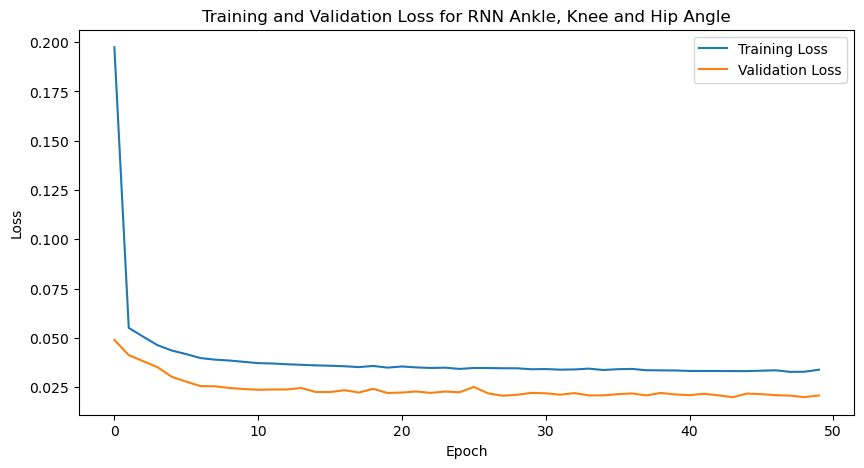

In [137]:
train_loss = model.history['loss']
val_loss = model.history['val_loss']

# Plotting training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss for RNN Ankle, Knee and Hip Angle')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

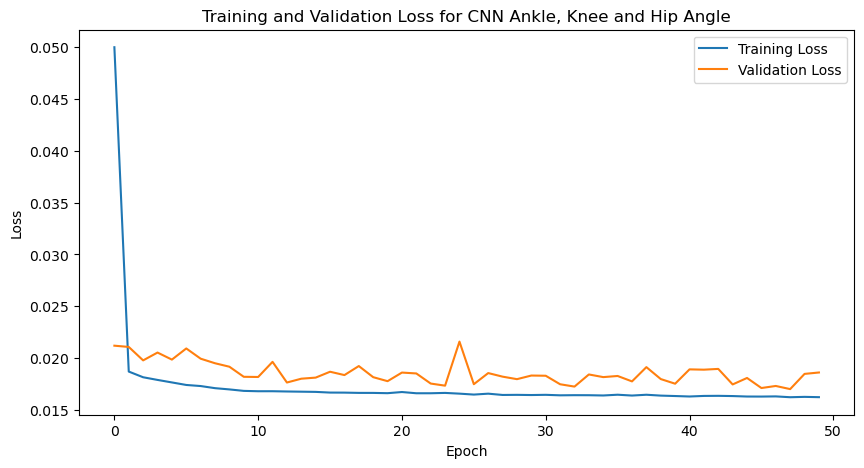

In [123]:
train_loss = fit.history['loss']
val_loss = fit.history['val_loss']

# Plotting training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss for CNN Ankle, Knee and Hip Angle')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

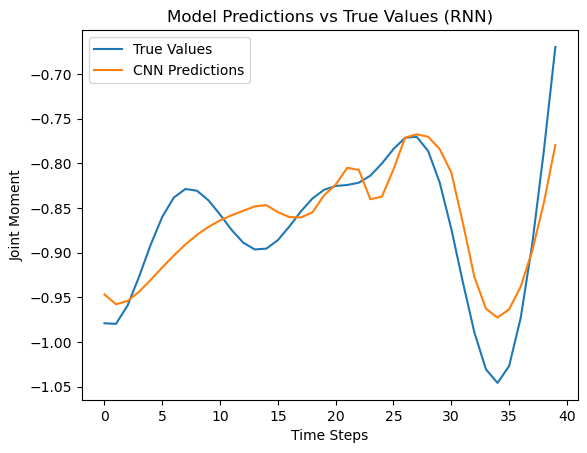

In [138]:
#from matplotlib import plt


plt.plot(Y_testing.values, label='True Values')
plt.plot(predicted, label='CNN Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Joint Moment')
plt.title(f'Model Predictions vs True Values ({"RNN"})')
plt.legend()
plt.show()

In [140]:
from sklearn.metrics import mean_squared_error

# Assuming `true_values` and `cnn_predictions` are the data used in your plot
mse = mean_squared_error(Y_testing.values, predicted)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0018346448403531509
